In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [20]:
import matplotlib
matplotlib.rcParams['font.family'] = 'Microsoft YaHei'

In [21]:

a_ee = pd.read_excel(r'..\taidi\demo2\Q2_resume(分词).xlsx' )
a_er = pd.read_excel(r'..\taidi\demo2\Q2_joblist(分词).xlsx')

In [5]:
sub_er= pd.read_csv(r'..\taidi\提交文件\result1-1.csv' , encoding='ANSI')
sub_ee = pd.read_csv(r'..\taidi\提交文件\result1-2.csv', encoding='ANSI')

In [18]:
a = pd.DataFrame(a_er.iloc[10])
b = pd.DataFrame(a_ee.iloc[19])
c = pd.DataFrame(sub_er.iloc[10])
d = pd.DataFrame(sub_ee.iloc[19])
print(a)
print(b)
# set(a_er['function'])
a.to_excel('er_info.xlsx')
b.to_excel('ee_info.xlsx')
c.to_excel('cn_er_info.xlsx')
d.to_excel('cn_ee_info.xlsx')

                                                                          10
index                                                                     11
id                                                       1461591923750993920
enterpriseName                                                  上海众言网络科技有限公司
positionName                                                         数据分析工程师
willNature                                                                全职
minimumWage                                                             7000
maximumWage                                                            10000
payMethod                                                                 月薪
exp                                                                     经验不限
exp_min                                                                    0
exp_max                                                                  100
edu_require                                                               本科

公司数量，
按支付方式分组，对薪资水平进行统计描述
按学历分组，对薪资水平统计描述
按经验分组，对薪资水平统计描述
按企业类型，对薪资水平统计描述

In [23]:
# def add_nian(i):
#     if i == '1' or '3' or '5' or '10' or '0':
#         i = i + '年'
#         return i
#     else:
#         return i
def add_nian(i):
    if i.endswith(('1', '3', '5', '10', '0')):
        i = i + '年'
        return i
    else:
        return i



In [24]:
exp = []
for i in range(len(a_er['exp'])):
    exp.append(add_nian(a_er['exp'][i]))
set(exp)

{'1-3年',
 '10年以上',
 '1年以上',
 '3-5年',
 '3年以上',
 '5-10年',
 '5-7年',
 '5年以上',
 '7年以上',
 '经验不限'}

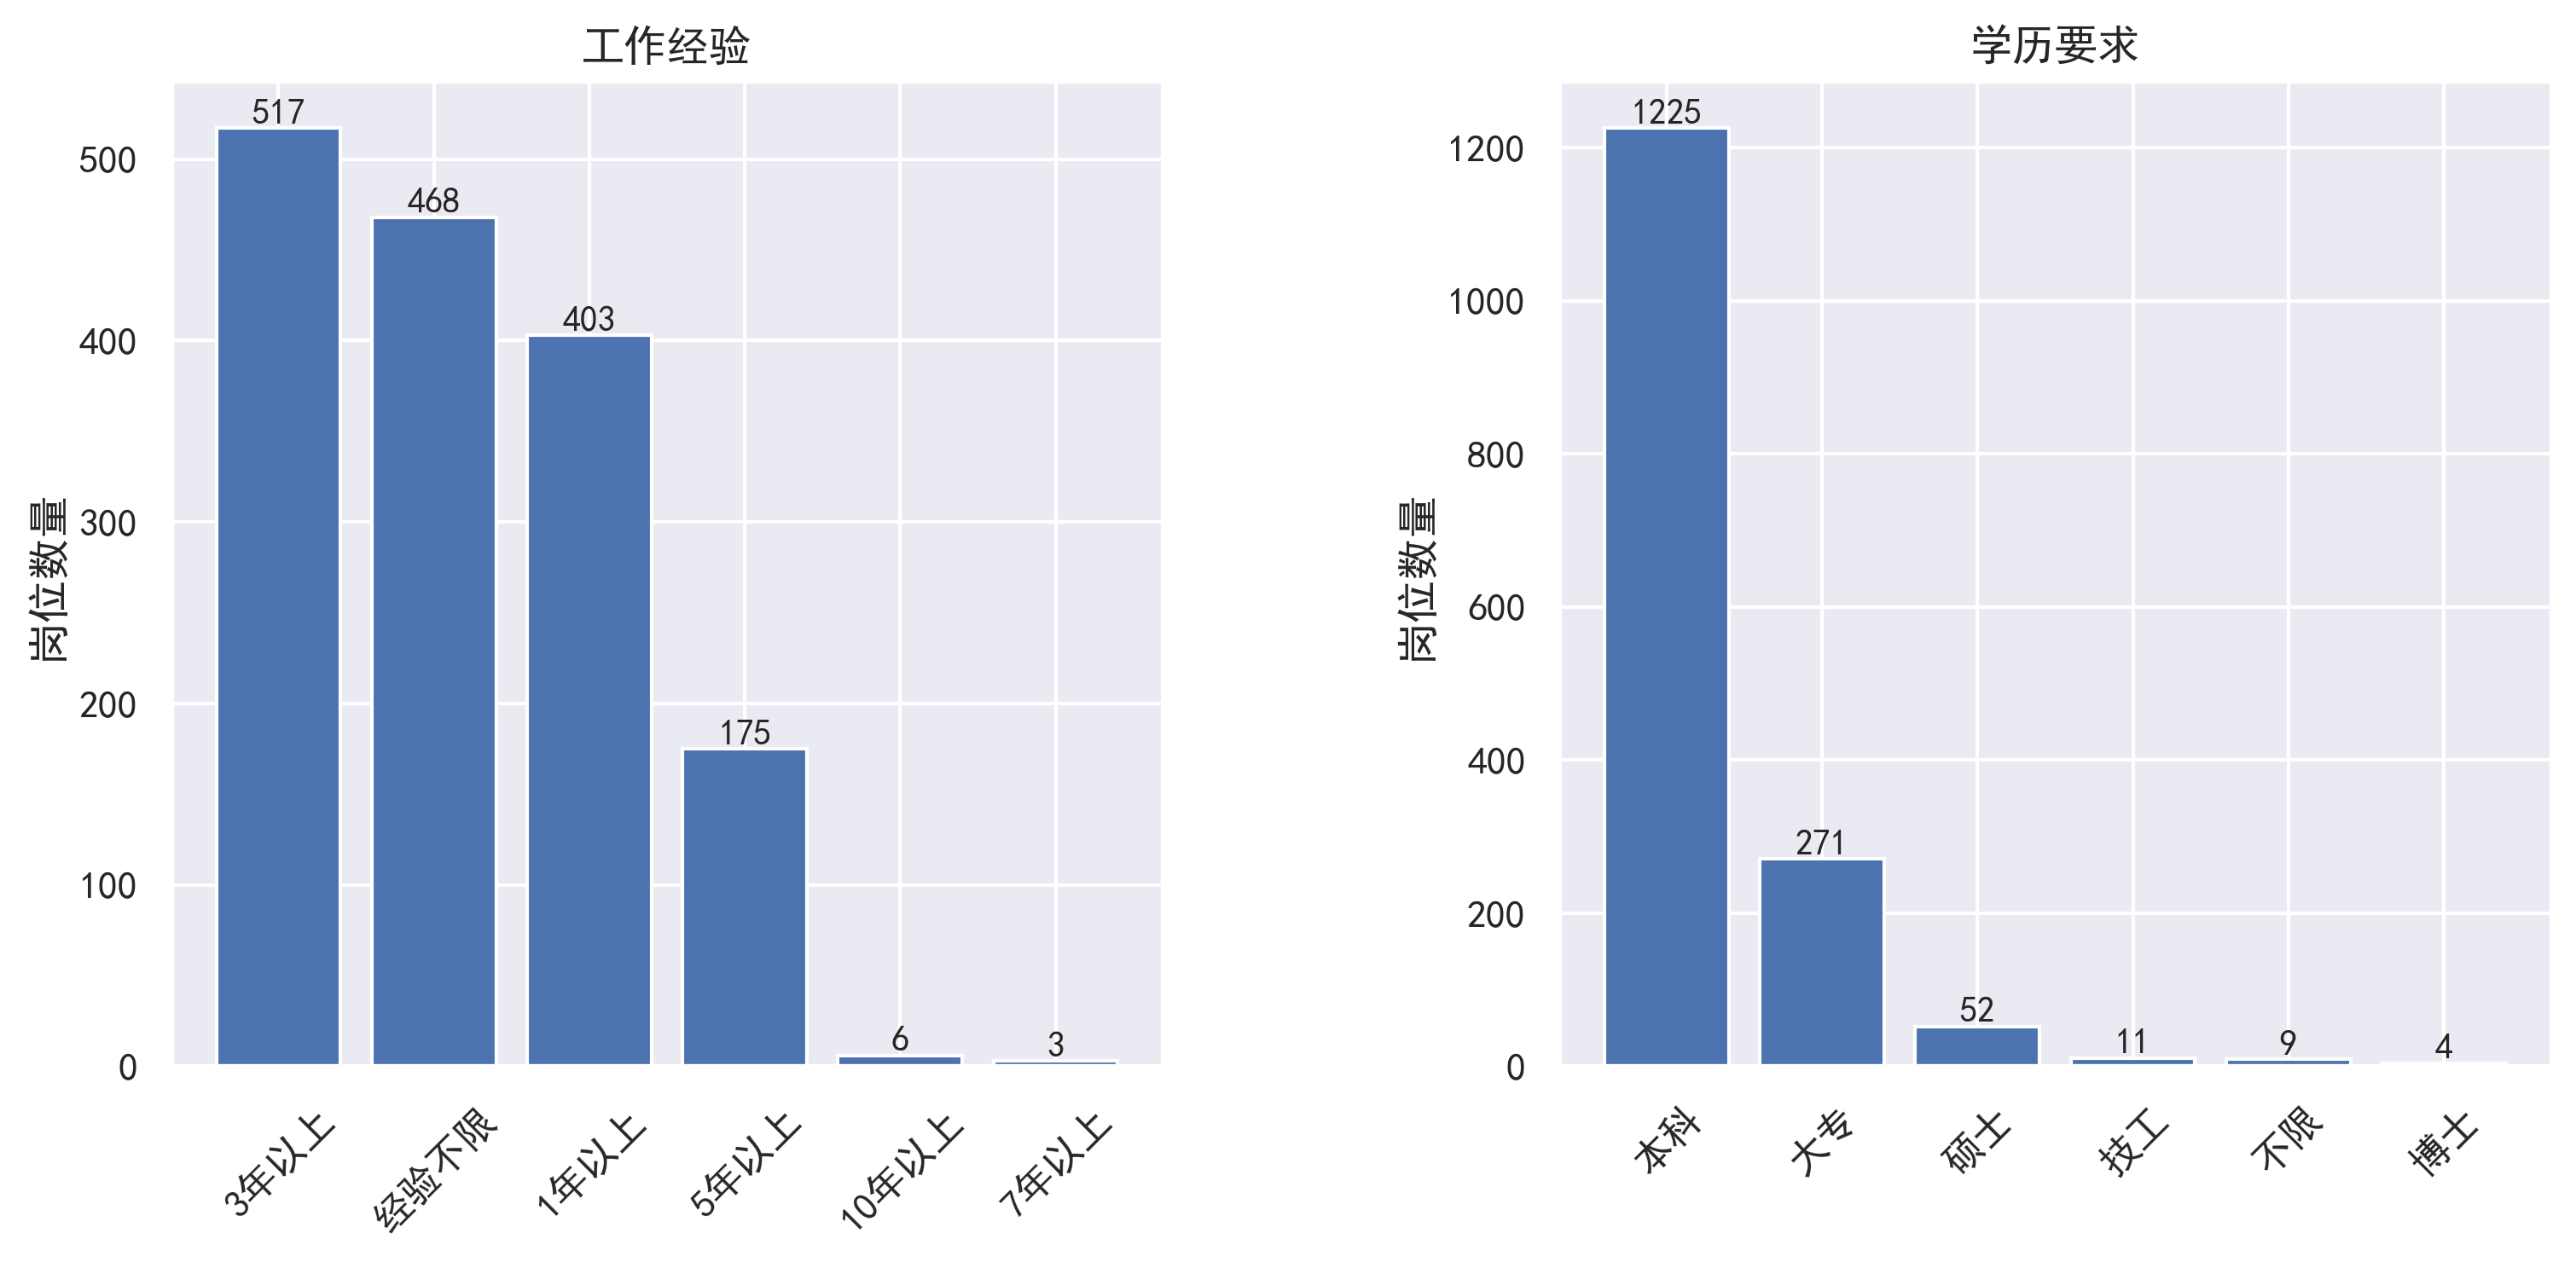

In [12]:
# 设置画布大小
plt.figure(figsize=(12,5), dpi=300,facecolor='w')

plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决无法显示符号的问题
sns.set(font='SimHei', font_scale=1)        # 解决Seaborn中文显示问题

# 第一张图
plt.subplot(1, 2, 1)
count_num = a_er['exp'].value_counts()
bar = plt.bar(count_num.index, count_num.values)#color="gray",edgecolor="k",hatch="///"
for x, y in zip(count_num.index, count_num.values):
    plt.text(x, y, str(y), ha='center', va='bottom', fontsize=10)  # 显示数字
plt.xticks(rotation=45)
plt.title('工作经验')
# plt.xlabel('经验')
plt.ylabel('岗位数量')

# 第二张图
plt.subplot(1, 2, 2)
count_num = a_er['edu_require'].value_counts()
bar = plt.bar(count_num.index, count_num.values)#,color="gray",edgecolor="k"
for x, y in zip(count_num.index, count_num.values):
    plt.text(x, y, str(y), ha='center', va='bottom', fontsize=10)  # 显示数字
plt.xticks(rotation=45)
plt.title('学历要求')
# plt.xlabel('学历')
plt.ylabel('岗位数量')

# 调整子图之间的间距
plt.subplots_adjust(wspace=0.4)

# 显示图形
plt.show()




In [29]:
a_er1 = a_er.dropna(subset=['fixed_province'])
a_er1.replace('','未知',inplace=True)
t = []
def count_kind(x):
    s = list(x['fixed_province'])
    t.append(s[0])
    return t
a_er1_kind = a_er1.groupby('enterpriseName').apply(count_kind)
t = pd.DataFrame(a_er1_kind[0])

t[0].value_counts()
t1 = t.copy()
t[0].value_counts()
set(t1[0])


C:\Users\hjwgrin\AppData\Local\Temp\ipykernel_7084\3993850487.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_er1.replace('','未知',inplace=True)


{'上海市',
 '北京市',
 '四川省',
 '山东省',
 '广东省',
 '江苏省',
 '江西省',
 '浙江省',
 '湖北省',
 '湖南省',
 '福建省',
 '贵州省',
 '辽宁省'}

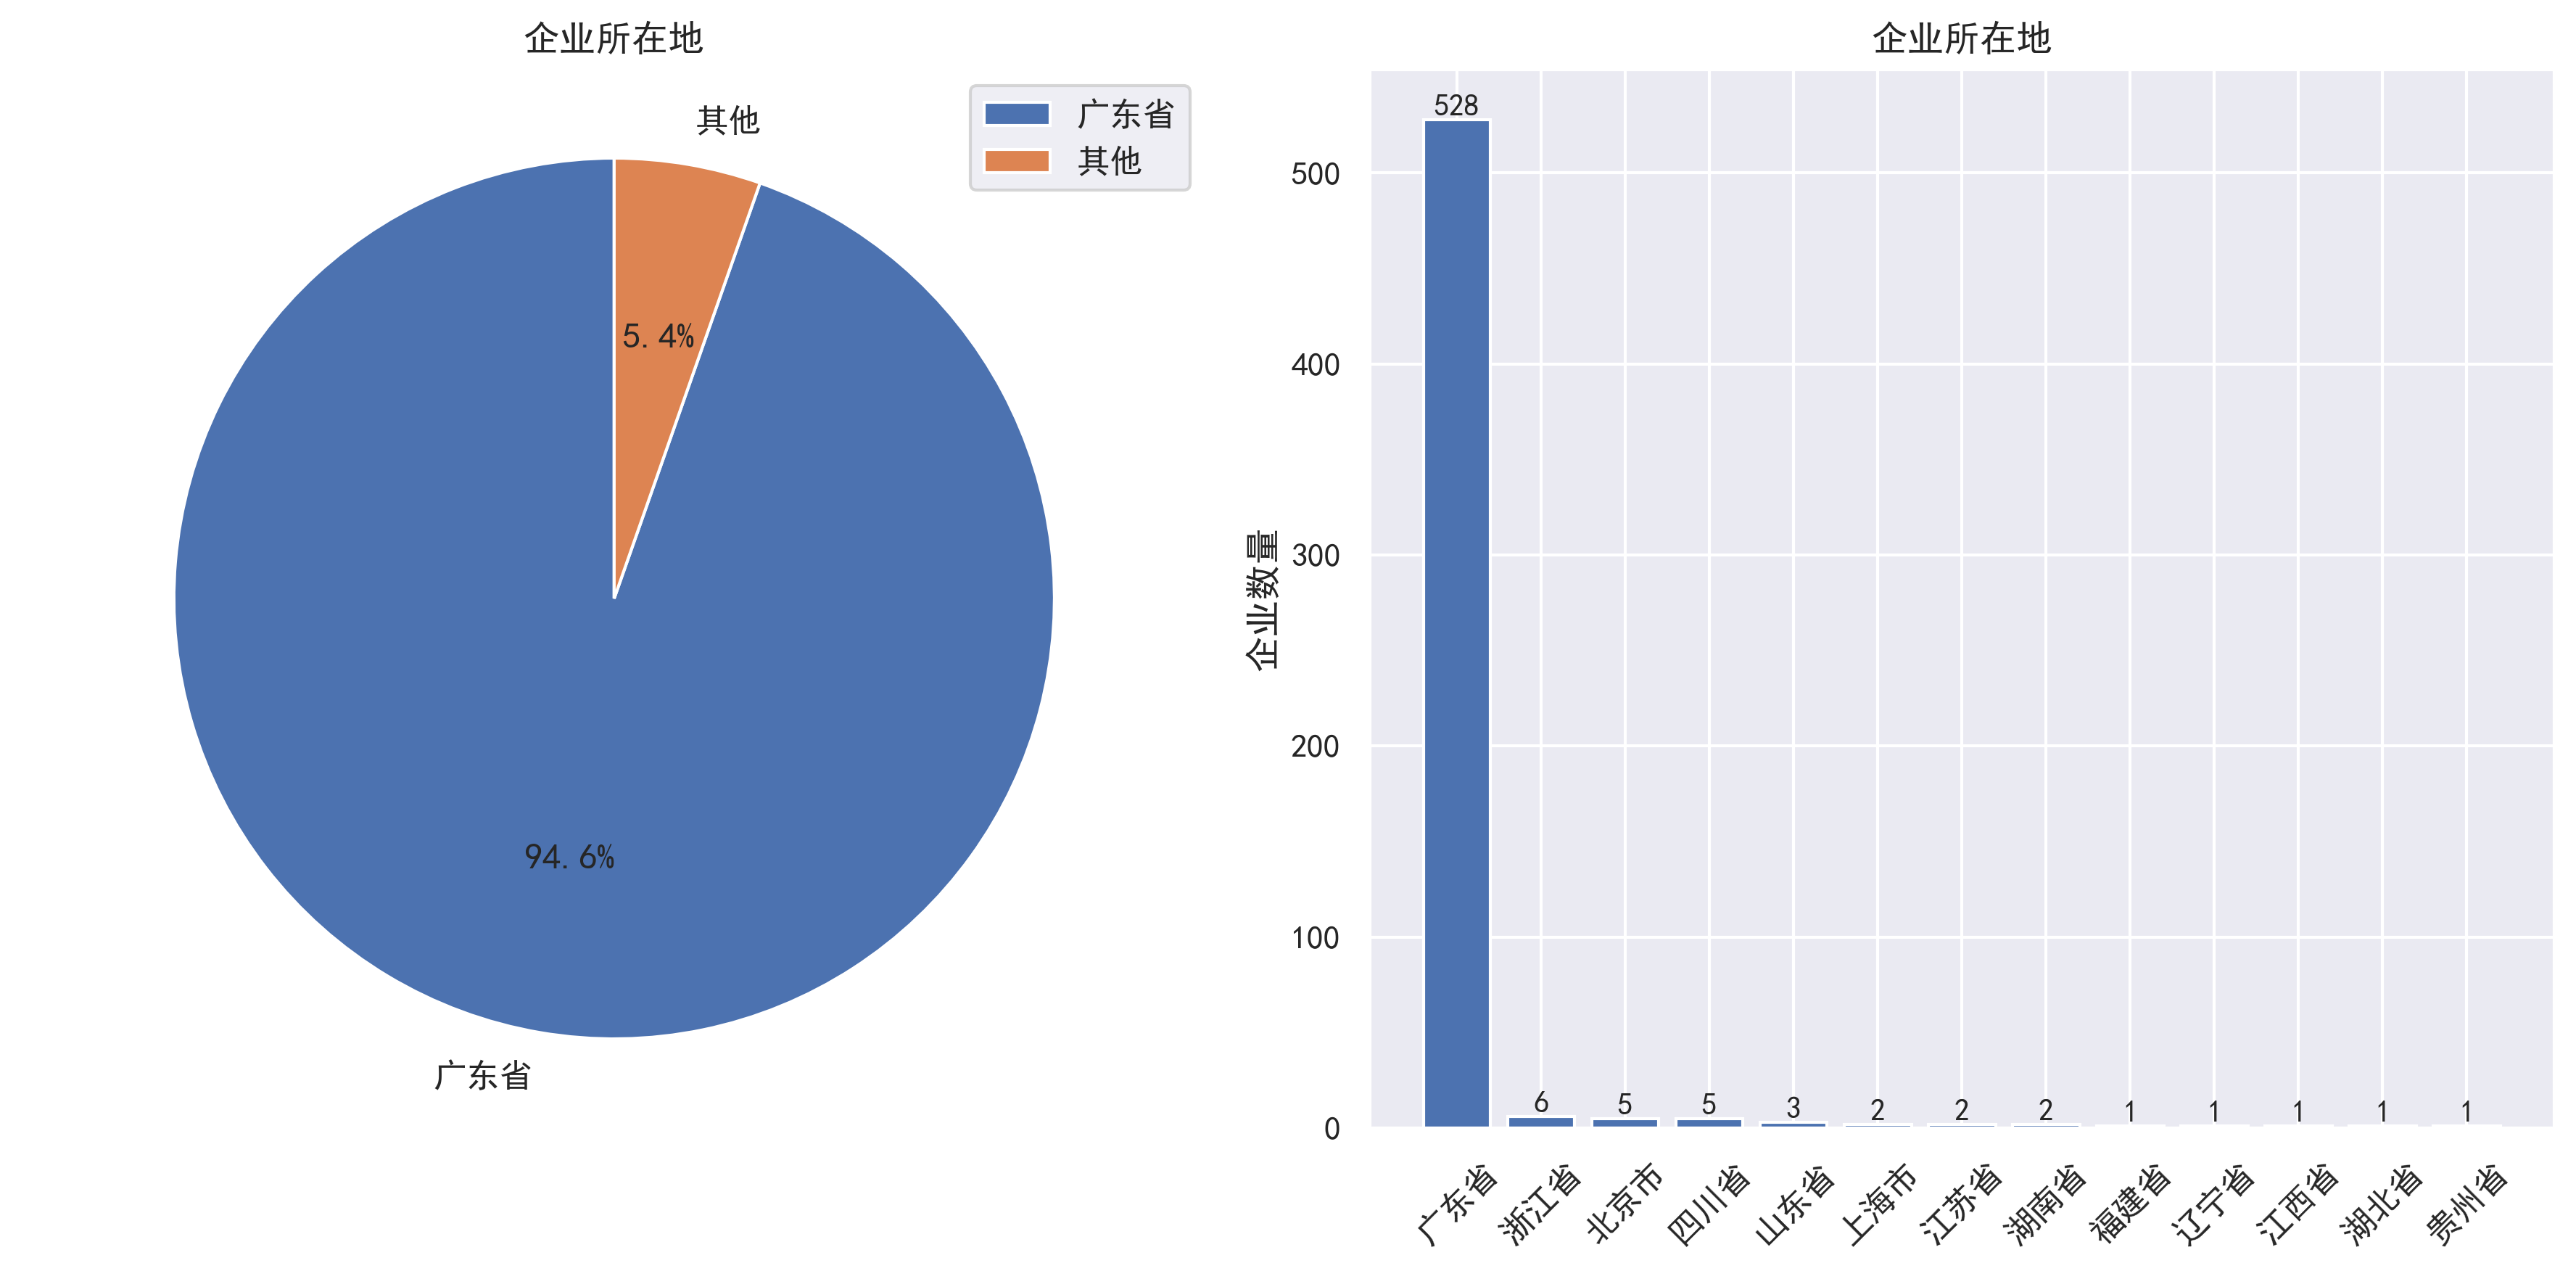

In [30]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决无法显示符号的问题
sns.set(font='SimHei', font_scale=1)    

# 绘图
plt.figure(figsize=(12, 6), dpi=300, facecolor='w')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 将非“广东省”值替换为“其他”
a_er1 = a_er.dropna(subset=['fixed_province'])
# a_er1.loc[~a_er1['fixed_province'].str.contains('广东省'), 'fixed_province'] = '其他'
t.loc[~t[0].str.contains('广东省'), 0] = '其他'
# 数据
labels1 = t[0].value_counts().index
values1 = t[0].value_counts().values


plt.subplot(1, 2, 1)
plt.pie(values1, labels=labels1, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('企业所在地')
plt.legend()

plt.subplot(1, 2, 2)
count_num = t1[0].value_counts()
bar = plt.bar(count_num.index, count_num.values)
for x, y in zip(count_num.index, count_num.values):
    plt.text(x, y, str(y), ha='center', va='bottom', fontsize=10)  # 显示数字
plt.xticks(rotation=45)
plt.title('企业所在地')
plt.ylabel('企业数量')

plt.tight_layout()
plt.savefig('企业地区分布.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [90]:
count_num.index

Index(['广东省', '浙江省', '北京市', '四川省', '山东省', '上海市', '江苏省', '湖南省', '福建省', '辽宁省',
       '江西省', '湖北省', '', '贵州省'],
      dtype='object')

In [31]:
a_er1 = a_er.dropna(subset=['eA_econKind'])
t = []
def count_kind(x):
    s = list(x['eA_econKind'])
    t.append(s[0])
    return t
a_er1_kind = a_er1.groupby('enterpriseName').apply(count_kind)
t = pd.DataFrame(a_er1_kind[0])
t1 = t.copy()
t[0].value_counts()
t1
# t1 = pd.DataFrame(t1)

,0
0,民营公司
1,民营公司
2,民营公司
3,民营公司
4,民营公司
...,...
554,合资
555,合资
556,合资
557,民营公司


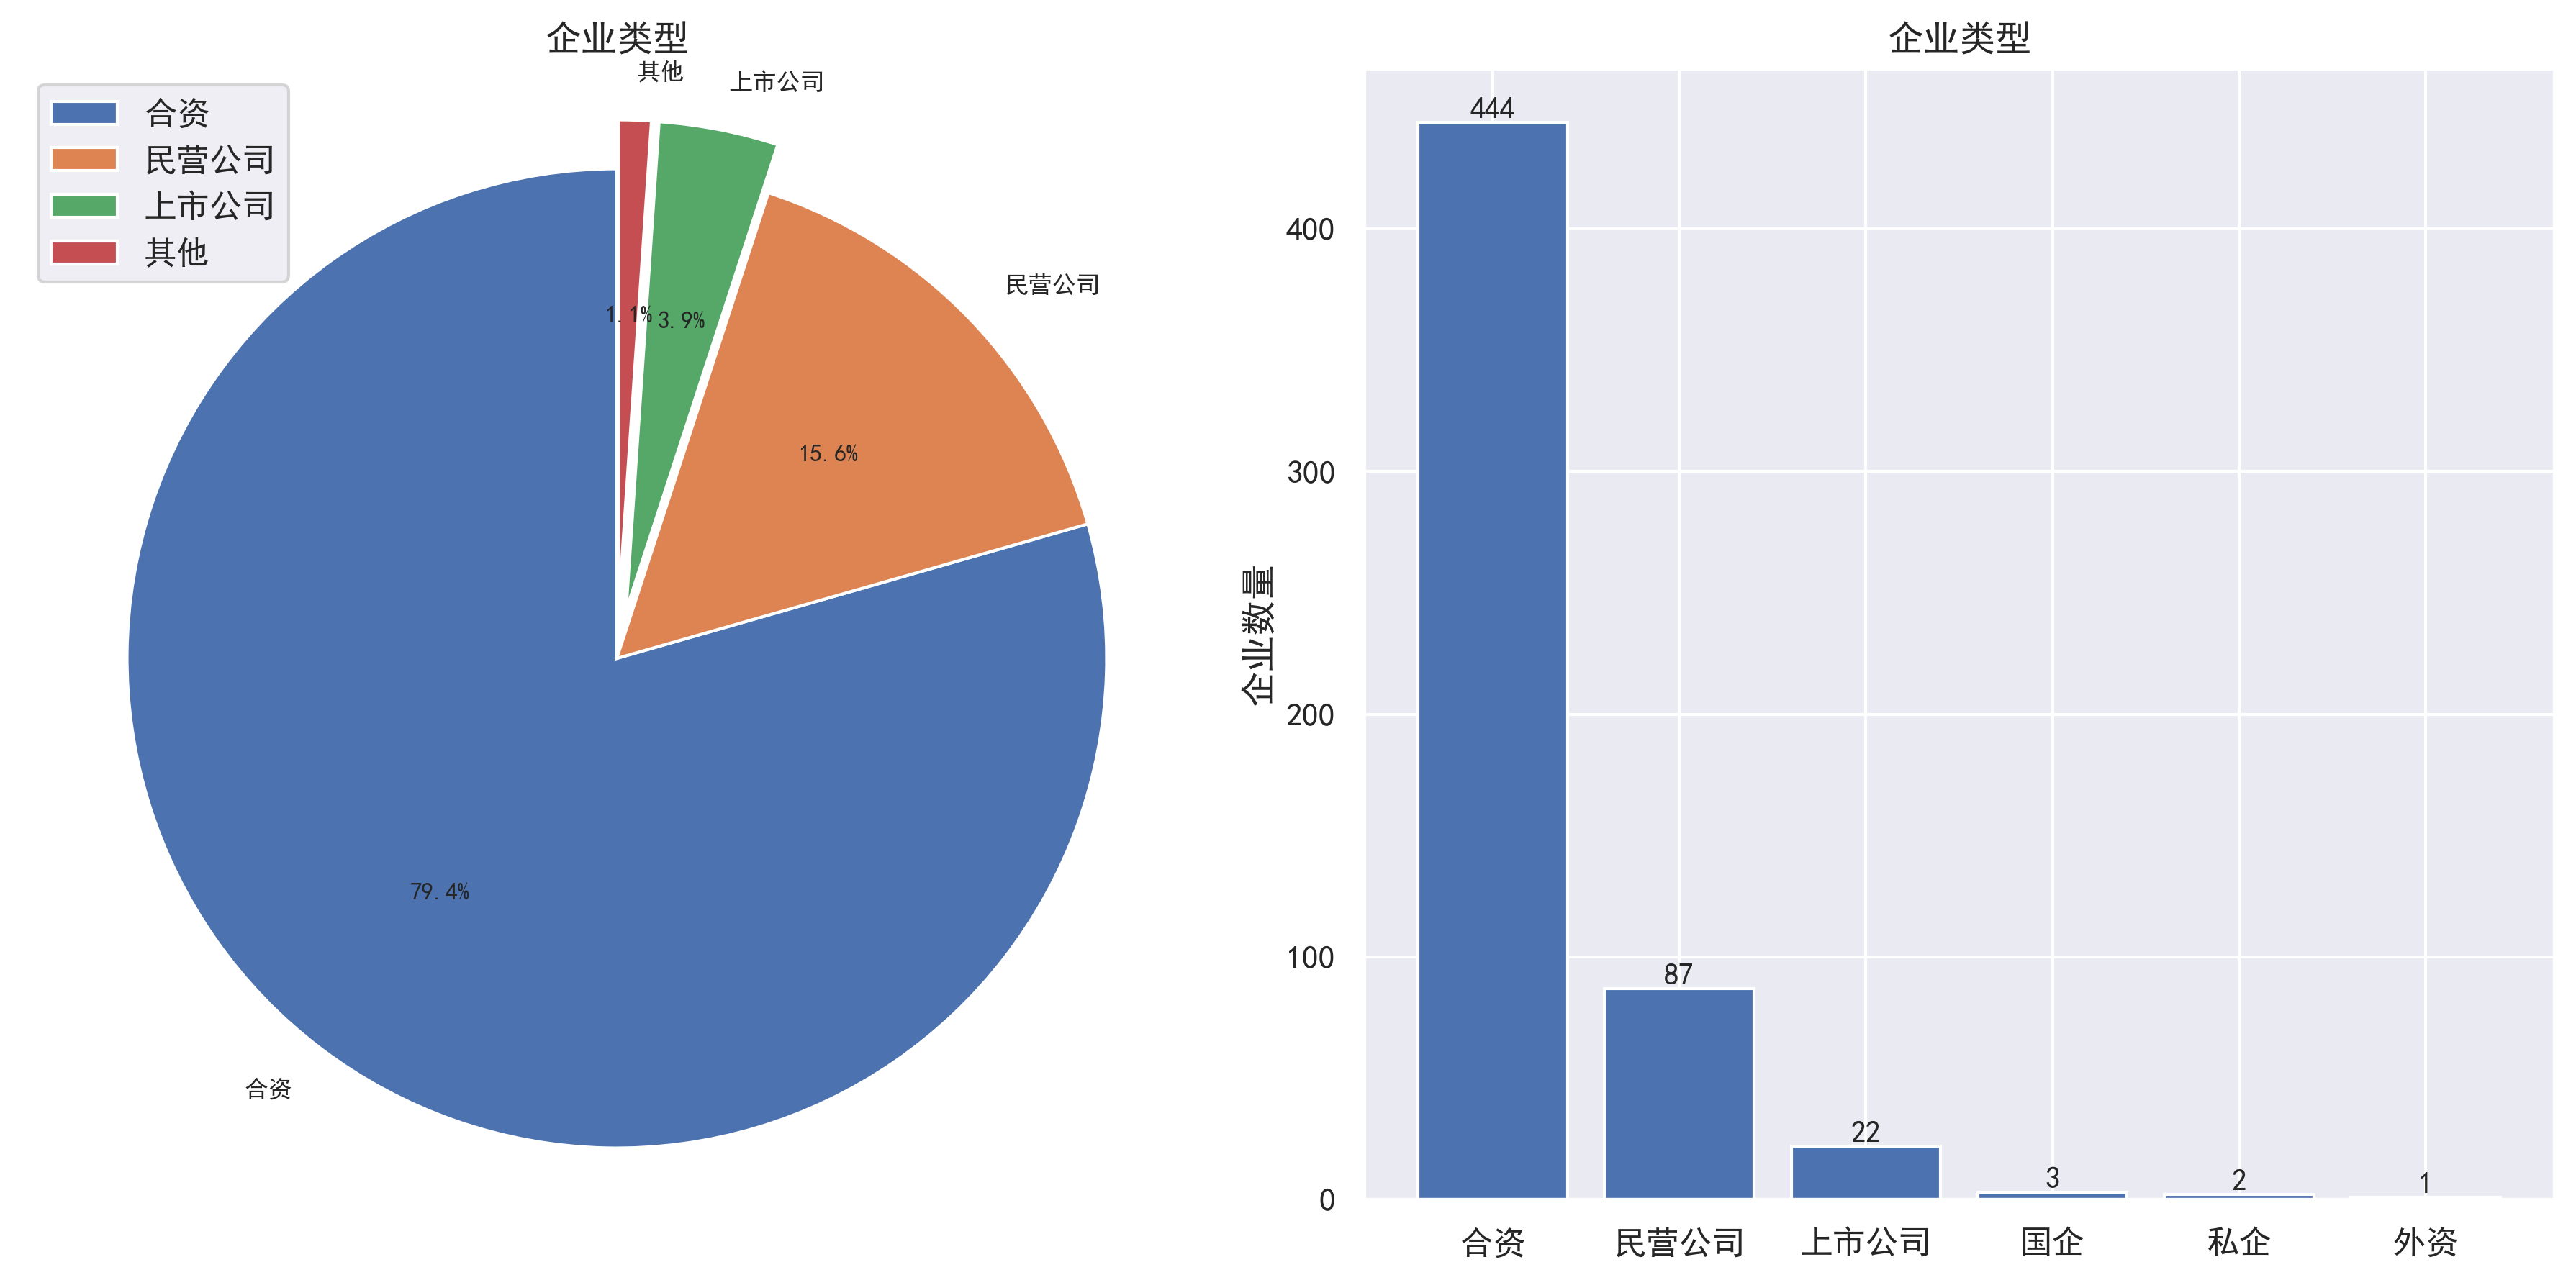

In [32]:
# 绘图
plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决无法显示符号的问题
sns.set(font='SimHei', font_scale=1)    
plt.figure(figsize=(12, 6), dpi=300, facecolor='w')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 9

a_er1 = a_er.dropna(subset=['eA_econKind'])
# a_er1.loc[~a_er1['eA_econKind'].str.contains('合资|民营公司|上市公司'), 'eA_econKind'] = '其他'
t.loc[~t[0].str.contains('合资|民营公司|上市公司'), 0] = '其他'
# 数据
labels1 = t[0].value_counts().index
values1 = t[0].value_counts().values


plt.subplot(1, 2, 1)
plt.pie(values1, labels=labels1, autopct='%1.1f%%', startangle=90,
        textprops={'fontsize': 8},#标签大小
        explode=(0,0,0.1,0.1))
plt.axis('equal')
plt.title('企业类型')
plt.legend()

plt.subplot(1, 2, 2)
count_num = t1[0].value_counts()
bar = plt.bar(count_num.index, count_num.values)

for x, y in zip(count_num.index, count_num.values):
    plt.text(x, y, str(y), ha='center', va='bottom', fontsize=10)  # 显示数字
# plt.xticks(rotation=45)
plt.title('企业类型')
plt.ylabel('企业数量')

plt.tight_layout()
plt.savefig('企业类型.pdf', dpi=300, bbox_inches='tight')
plt.show()

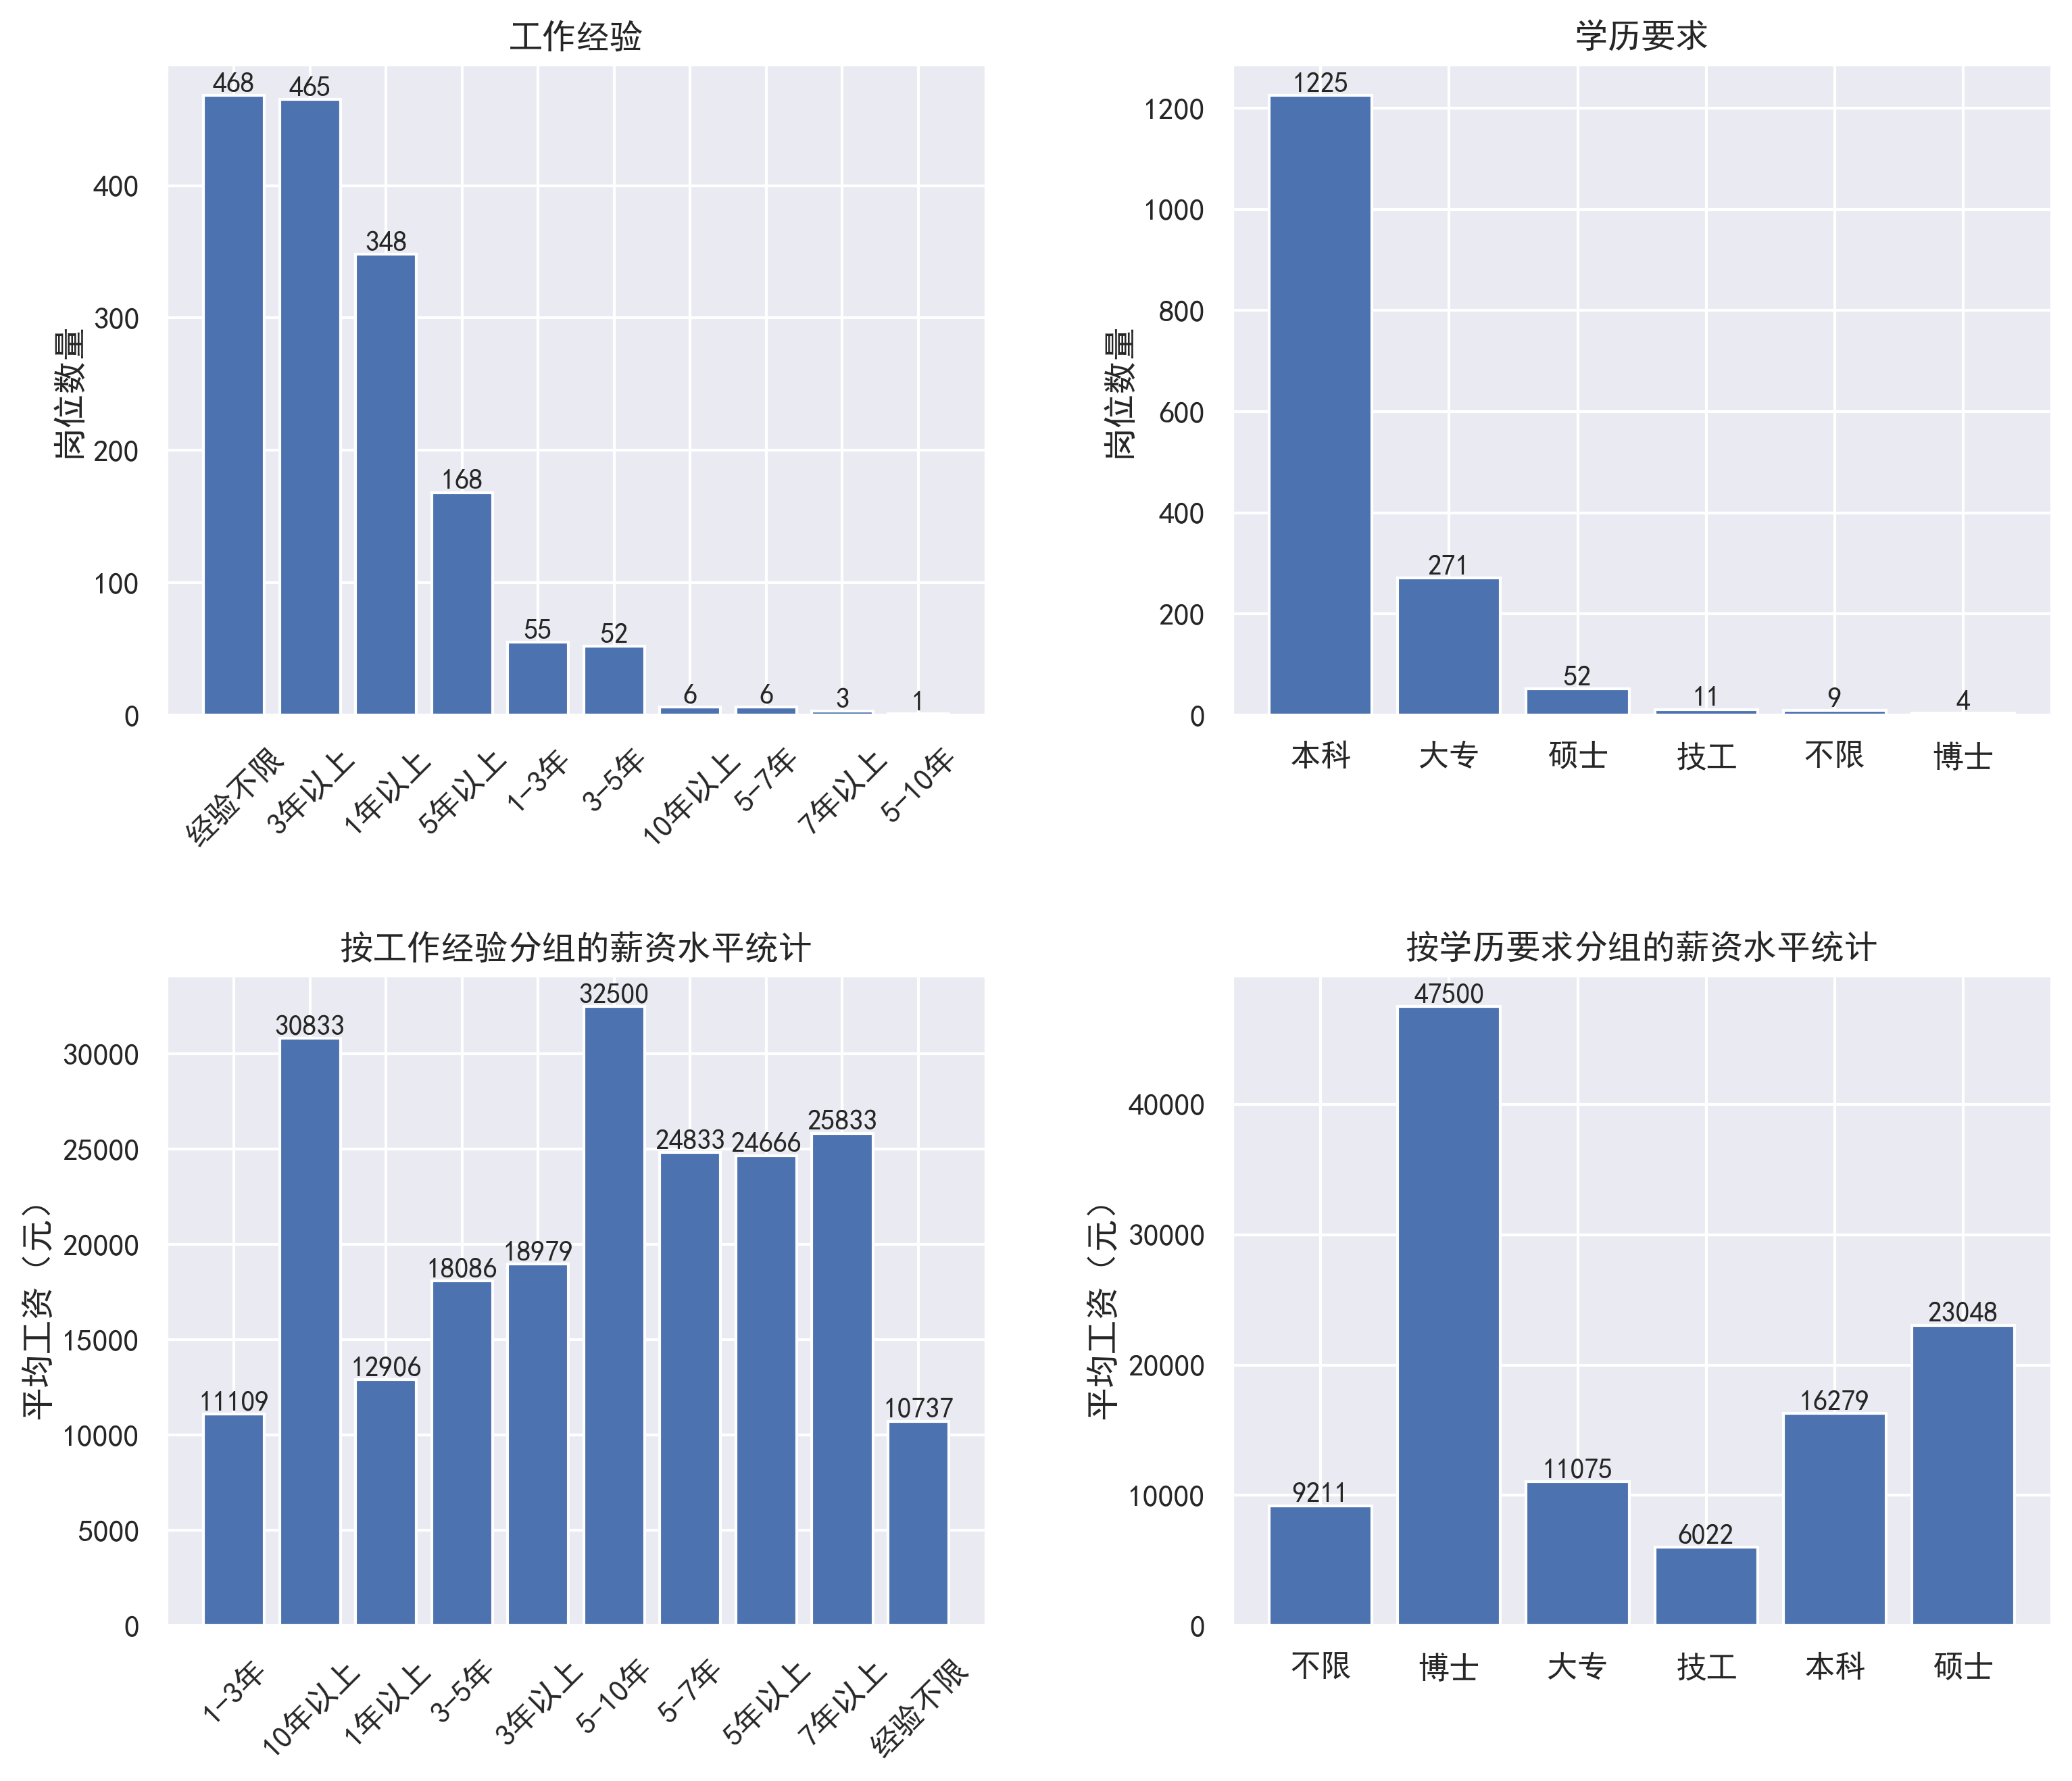

In [33]:
# 设置画布大小
plt.figure(figsize=(12,10), dpi=300,facecolor='w')

plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决无法显示符号的问题
sns.set(font='SimHei', font_scale=1)        # 解决Seaborn中文显示问题

# 第一张图
plt.subplot(2, 2, 1)
count_num = a_er['exp'].value_counts()
bar = plt.bar(count_num.index, count_num.values)#color="gray",edgecolor="k",hatch="///"
for x, y in zip(count_num.index, count_num.values):
    plt.text(x, y, str(y), ha='center', va='bottom', fontsize=10)  # 显示数字
plt.xticks(rotation=45)
plt.title('工作经验')
# plt.xlabel('经验')
plt.ylabel('岗位数量')

# 第二张图
plt.subplot(2, 2, 2)
count_num = a_er['edu_require'].value_counts()
bar = plt.bar(count_num.index, count_num.values)#,color="gray",edgecolor="k"
for x, y in zip(count_num.index, count_num.values):
    plt.text(x, y, str(y), ha='center', va='bottom', fontsize=10)  # 显示数字
# plt.xticks(rotation=45)
plt.title('学历要求')
# plt.xlabel('学历')
plt.ylabel('岗位数量')

# 调整子图之间的间距
# plt.subplots_adjust(wspace=0.5)


# 第三张图
plt.subplot(2, 2, 3)


# 按工作经验分组
exp_group = a_er.groupby('exp')

# 计算最低工资、最高工资和平均工资
exp_salary = exp_group[['minimumWage', 'maximumWage']].mean()
exp_salary['meanWage'] = (exp_salary['minimumWage'] + exp_salary['maximumWage']) / 2
exp_salary = exp_salary[['meanWage']]

# 绘制柱状图
bar = plt.bar(exp_salary.index, exp_salary.meanWage)
for x, y in zip(exp_salary.index, exp_salary.values):
    plt.text(x, y, int(y), ha='center', va='bottom', fontsize=10) 
# exp_salary.plot(kind='bar', rot=0)
plt.xticks(rotation=45)
plt.title('按工作经验分组的薪资水平统计')
# plt.xlabel('工作经验')
plt.ylabel('平均工资（元）')



plt.subplot(2, 2, 4)
# 按学历要求分组
edu_require_group = a_er.groupby('edu_require')

# 计算最低工资、最高工资和平均工资
edu_require_salary = edu_require_group[['minimumWage', 'maximumWage']].mean()
edu_require_salary['meanWage'] = (edu_require_salary['minimumWage'] + edu_require_salary['maximumWage']) / 2
edu_require_salary = edu_require_salary[['meanWage']]

# 绘制柱状图
bar = plt.bar(edu_require_salary.index, edu_require_salary.meanWage)
for x, y in zip(edu_require_salary.index, edu_require_salary.values):
    plt.text(x, y, int(y), ha='center', va='bottom', fontsize=10) 
# edu_require_salary.plot(kind='bar', rot=0)
plt.title('按学历要求分组的薪资水平统计')
# plt.xlabel('学历要求')
plt.ylabel('平均工资（元）')

# 调整子图之间的间距
plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.savefig('学历经验工资.pdf', dpi=300, bbox_inches='tight')
plt.show()

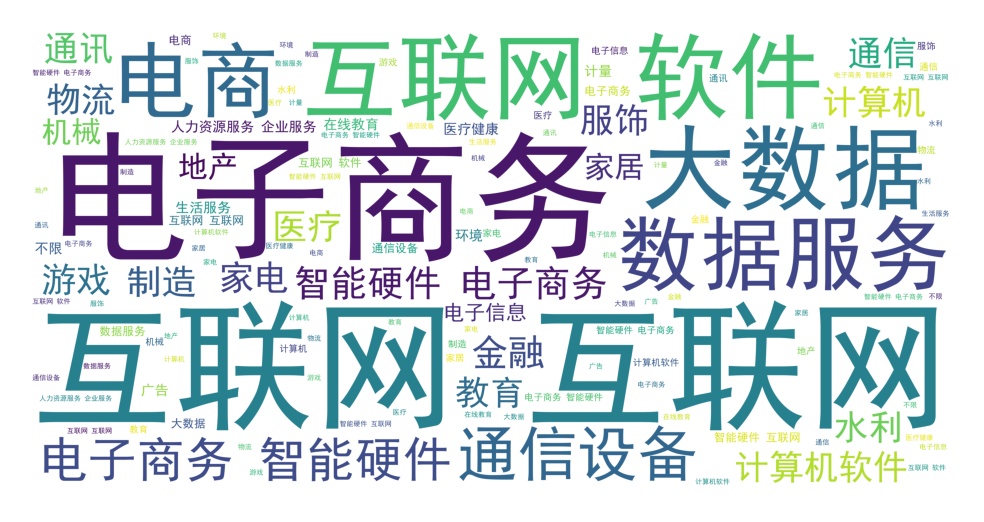

In [34]:


# 将“function”列用逗号合并成文本
text = ','.join(a_er['job_industry'])

# 生成词云图
wordcloud = WordCloud(width=400, height=200, 
                      font_path ='simhei.ttf', 
                      stopwords=['nan','\'','一般','彳亍','熟练','良好','其他'],
                    repeat = True,
                    random_state = 123,
                    scale=19,
                      prefer_horizontal  = 1, 
                      min_font_size = 3,
                      background_color='white').generate(text)
plt.figure(figsize=(4, 2), dpi=300)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('行业wordcloud.pdf', dpi=300, bbox_inches='tight')
plt.show()

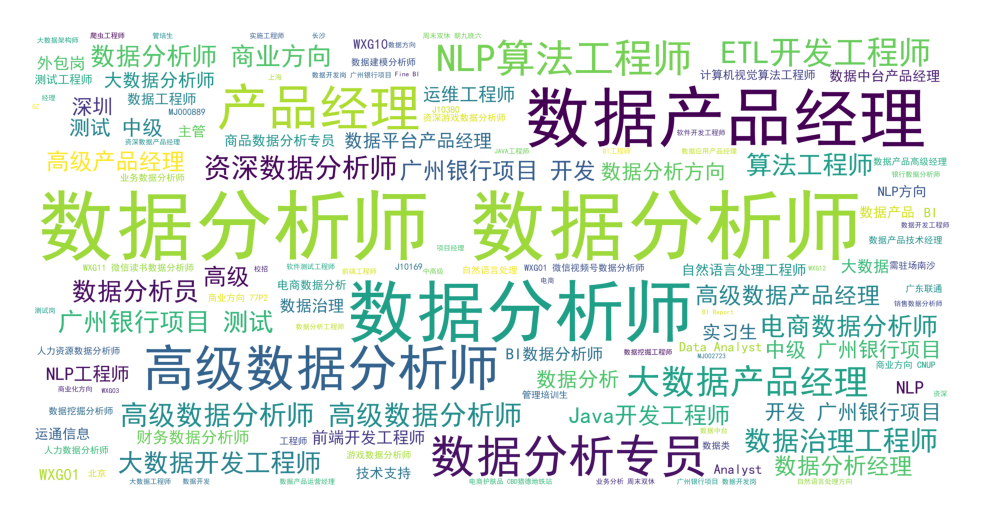

In [35]:
position_counts = a_er['positionName'].value_counts()
# 将“function”列用逗号合并成文本
text = ','.join(a_er['positionName'])

# 生成词云图
wordcloud = WordCloud(width=400, height=200, 
                      font_path ='simhei.ttf', 
                      stopwords=['nan','\'','一般','彳亍','熟练','良好','其他','广州'],
                    # repeat = True,
                    random_state = 123,
                    scale=19,
                      prefer_horizontal  = 1, 
                      min_font_size = 3,
                      background_color='white').generate(text)
plt.figure(figsize=(4, 2), dpi=300)
plt.imshow(wordcloud)
plt.axis('off')

plt.savefig('岗位需求wordcloud.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [36]:
a_er = a_er.replace(np.nan,'')
b = {
    '年终奖金':0,
    '餐饮补贴':0,
    '免费住宿':0,
    '绩效奖金':0,
    '交通补贴':0,
    '员工旅游':0,
    '五险一金':0,
    '弹性工作':0,
    '股票期权':0,
    '通讯补贴':0,
    '专业培训':0,
    '定期体检':0,
    '免费班车':0,
    '出国机会':0
     }
for i in range(a_er.shape[0]):
    for j in a_er.loc[i,'welfare'].split(','):
        if j == '':
            continue
        else:
            b[j] += 1
b
a = pd.DataFrame.from_dict(b, orient='index', columns=['value'])
a


,value
年终奖金,157
餐饮补贴,1310
免费住宿,1
绩效奖金,190
交通补贴,137
员工旅游,81
五险一金,384
弹性工作,1345
股票期权,38
通讯补贴,133


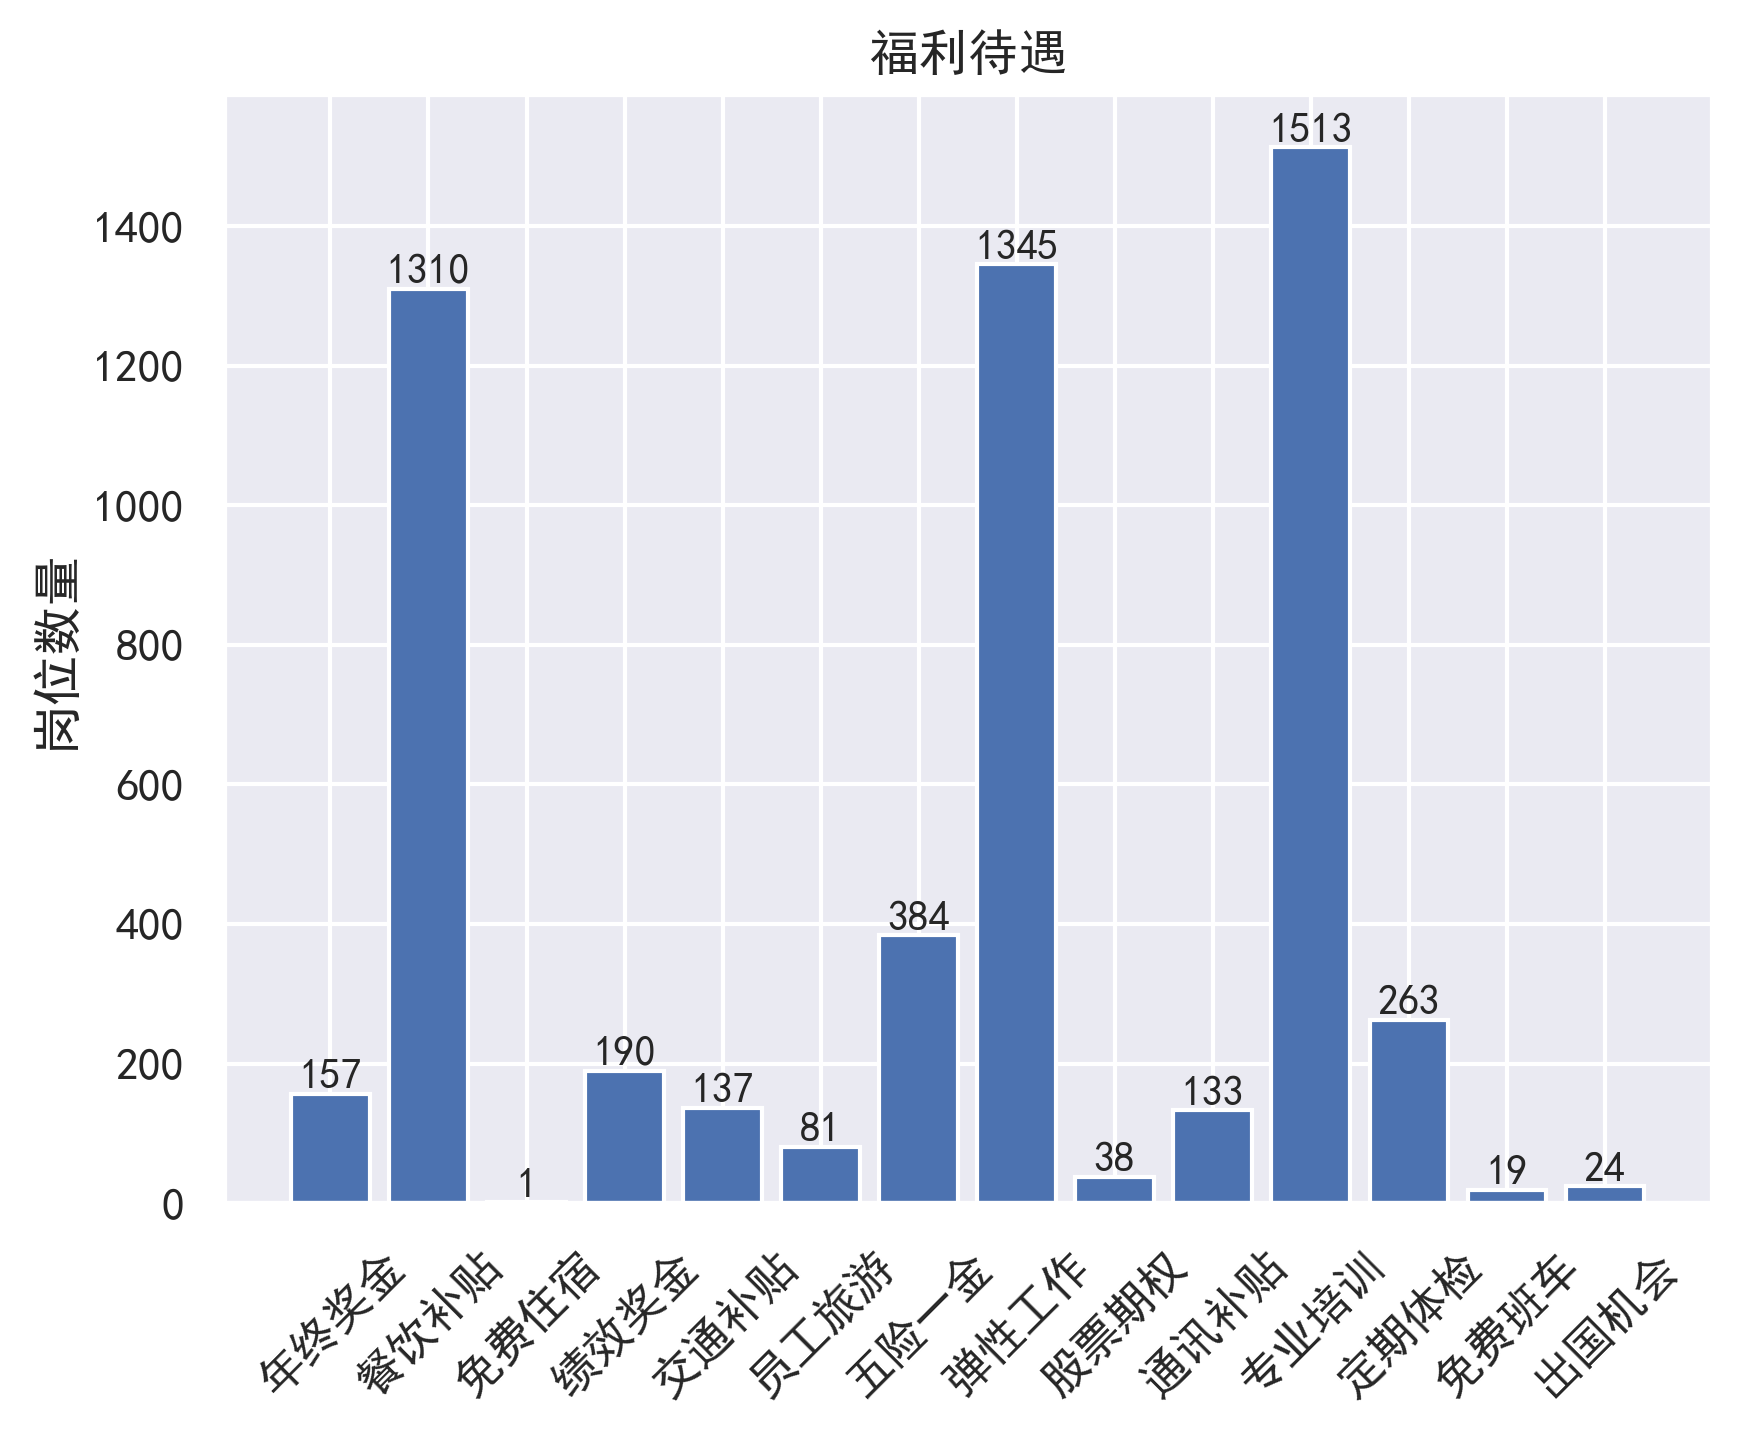

In [37]:
# edu_require
# count_num = a_er['edu_require'].value_counts()
plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决无法显示符号的问题
sns.set(font='SimHei', font_scale=1)    
fig, ax = plt.subplots(dpi = 300)
bar = ax.bar(a.index, a['value'])
for x, y in zip(a.index, a['value']):
    plt.text(x, y, str(y), ha='center', va='bottom', fontsize=10)#显示数字
plt.xticks(rotation=45)
# 添加标题和标签
plt.title('福利待遇')
# plt.xlabel('Job Nature')
plt.ylabel('岗位数量')

# 显示图形
plt.savefig('福利.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [25]:
a.index

Index(['年终奖金', '餐饮补贴', '免费住宿', '绩效奖金', '交通补贴', '员工旅游', '五险一金', '弹性工作', '股票期权',
       '通讯补贴', '专业培训', '定期体检', '免费班车', '出国机会'],
      dtype='object')